In [1]:
import src.main.graph_generation as graph_generation
from src.main.graph_generation import Nii_loader
import src.main.get_dataset

import numpy as numpy
import matplotlib.pyplot as plt


import numpy as np
from torch.utils.data import random_split

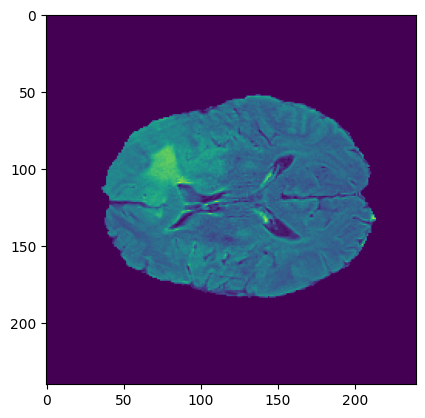

In [2]:
nl = Nii_loader(file_id="030")
nl.normalize_all()
nl.change_to_binary_mask()
plt.imshow(nl.flair[:, :, 77])

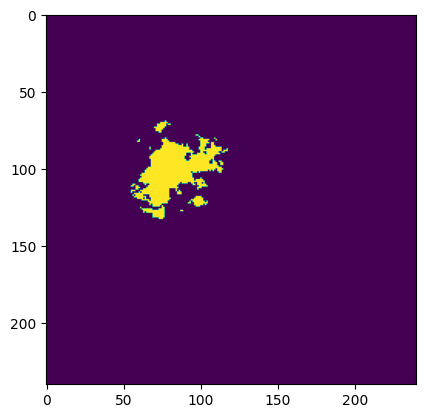

In [3]:
plt.imshow(nl.mask[:, :, 77])

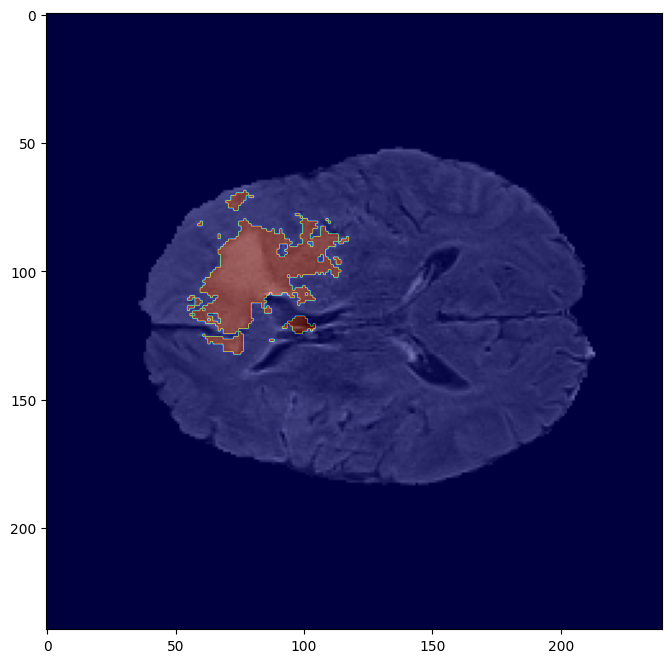

In [4]:
plt.figure(figsize=(8, 8))
plt.imshow(nl.flair[:, :, 77], cmap='gray')
# Overlaying the mask
plt.imshow(nl.mask[:, :, 77], cmap='jet', alpha=0.5)


In [5]:
(
    nii_loader,
    img_stacked,
    slic_labels,
    list_of_labels_unique,
    list_of_supervoxels,
    list_of_features,
    list_of_edge_indices,
    list_of_labels,
    list_of_weights,
    graph,
) = graph_generation.main(
    file_id="001",
    compactness=0.05,
    n_segments=1200,
    save_as="graph_test.pt",
    return_results=True,
)

INFO | 15:09:28 | Processing file_id 001:  70%|███████   | 770/1095 [01:52<00:47,  6.86it/s]


MemoryError: Unable to allocate 34.1 MiB for an array with shape (240, 240, 155) and data type float32

In [20]:
supervoxel_mask = np.zeros(nl.mask.shape, dtype=np.float32)

for idx in list_of_supervoxels[15].list_of_voxel_indices:
    supervoxel_mask[idx] = 1

In [29]:
nl.mask.shape

(240, 240, 155)

In [31]:
overlap = np.logical_and(nl.mask == 1, supervoxel_mask == 1)

# Count the number of overlapping elements
overlap_count = np.sum(overlap)

# Calculate the proportion of the second mask within the first one
total_mask2_elements = np.sum(supervoxel_mask == 1)
overlap_proportion = (
    overlap_count / total_mask2_elements if total_mask2_elements != 0 else 0
)

print(
    f"\nNumber of overlapping elements: {overlap_count} with total count of non-zero values: {total_mask2_elements}"
)
print("Proportion of second mask within the first one:", overlap_proportion)


Number of overlapping elements: 0 with total count of non-zero values: 1167
Proportion of second mask within the first one: 0.0


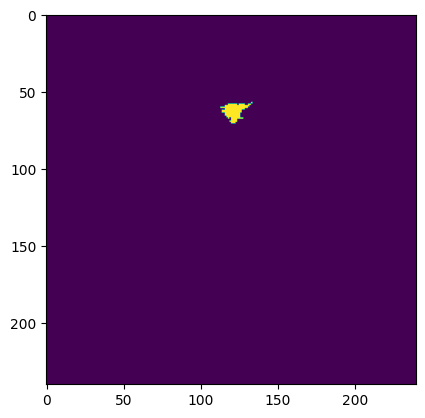

In [27]:
plt.imshow(supervoxel_mask[:, :, 90])

In [21]:
list_of_supervoxels[0].stacked_img.shape

(4, 240, 240, 155)

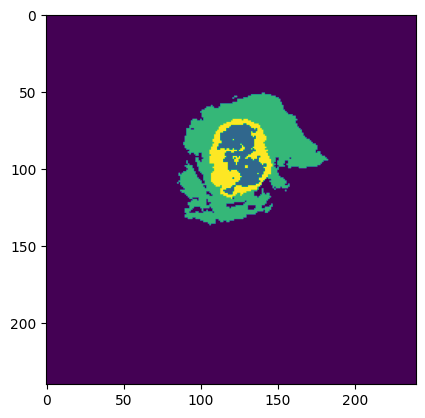

In [18]:
plt.imshow(list_of_supervoxels[0].seg_mask[:, :, 65])

In [34]:
nii_loader.t1.shape, type(nii_loader.t1)

((240, 240, 155), numpy.ndarray)

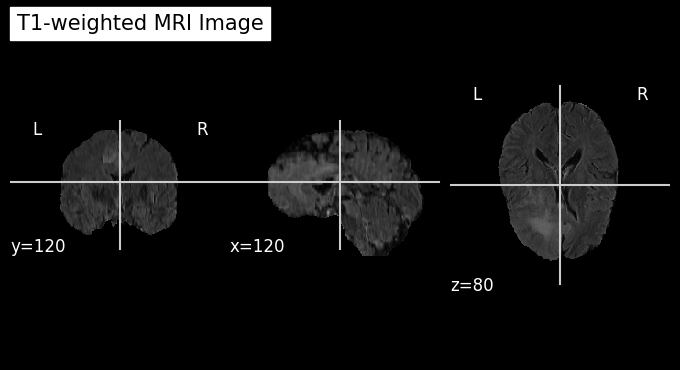

In [128]:
import numpy as np
import nibabel as nib
from nilearn import plotting

data = nl.flair
# Create a NIfTI image from the numpy array
img = nib.Nifti1Image(data, np.eye(4))  # Assuming affine transformation as identity matrix

# Plot the MRI image using Nilearn
plotting.plot_anat(img, title='T1-weighted MRI Image', cut_coords=(120, 120, 80))

# Display the plot
plotting.show()

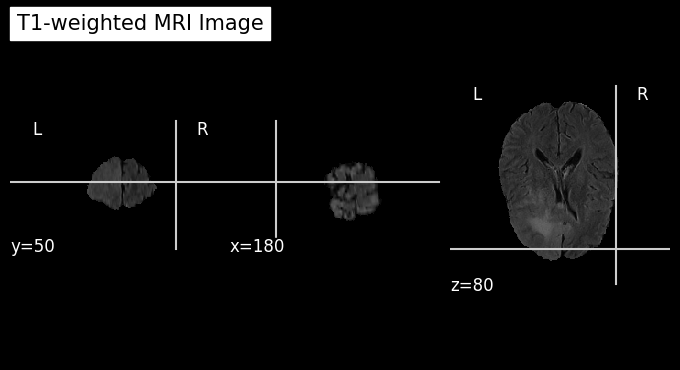

In [134]:
import numpy as np
import nibabel as nib
from nilearn import plotting

data = nl.flair
# Create a NIfTI image from the numpy array
img = nib.Nifti1Image(data, np.eye(4))  # Assuming affine transformation as identity matrix

# Plot the MRI image using Nilearn
plotting.plot_anat(img, title='T1-weighted MRI Image', cut_coords=(180, 50, 80))

# Display the plot
plotting.show()

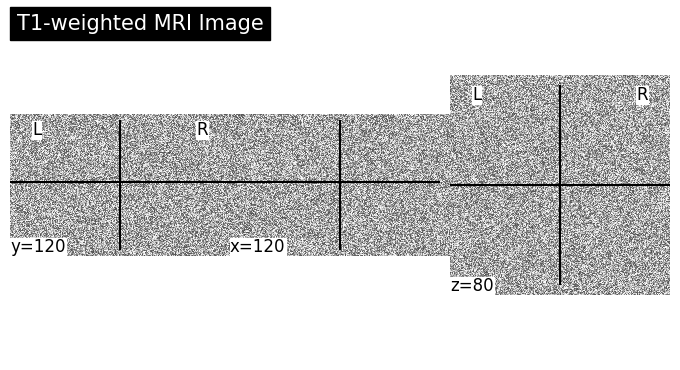

In [129]:
import numpy as np

data = np.random.rand(240, 240, 155)

# Create a NIfTI image from the numpy array
img = nib.Nifti1Image(data, np.eye(4))  # Assuming affine transformation as identity matrix

# Plot the MRI image using Nilearn
plotting.plot_anat(img, title='T1-weighted MRI Image', cut_coords=(120, 120, 80))

# Display the plot
plotting.show()

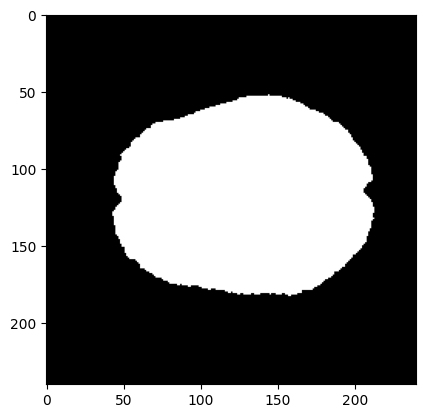

In [45]:
ab = nii_loader.get_slic_mask(nii_loader.flair)
plt.imshow(ab[:, : ,77], cmap="gray")

In [55]:
(nii_loader.t1ce ==0).sum(), (nii_loader.t1ce != 0).sum()

(7585115, 1342885)

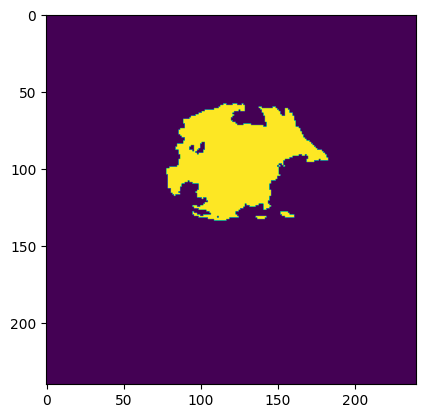

In [66]:
mask = np.where(nii_loader.mask == 0, 0, 1)

plt.imshow(mask[:, :, 77])

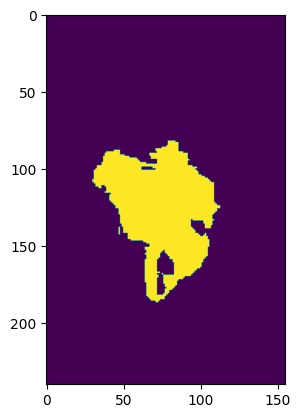

In [75]:
plt.imshow(mask[94, :, :])

In [78]:
type(view1), type(view2)

(nilearn.plotting.html_stat_map.StatMapView,
 nilearn.plotting.displays._slicers.OrthoSlicer)

In [95]:
nii_loader.mask.shape

(240, 240, 155)

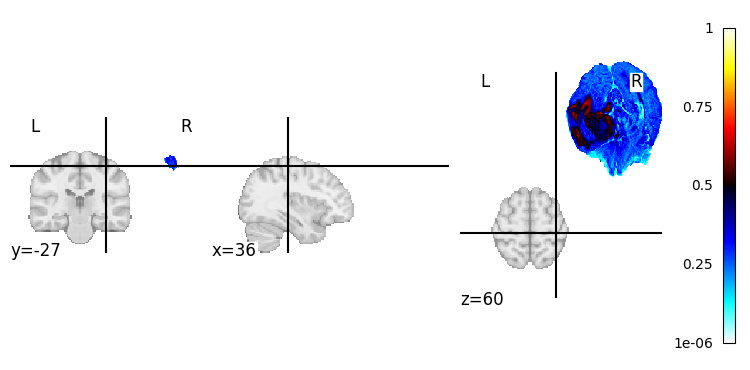

In [102]:
plotting.plot_stat_map(
    nib.Nifti1Image(nii_loader.flair, np.eye(4)),
    display_mode="ortho",
    cut_coords=[36, -27, 60],
)

In [86]:
import numpy as np
import nibabel as nib
from nilearn import plotting

mask_data = mask

mask_img = nib.Nifti1Image(mask_data, np.eye(4))

img = nib.Nifti1Image(
    data, np.eye(4)
)  # Assuming affine transformation as identity matrix

view1 = plotting.view_img(img, cmap="gray")
stat_map_view = plotting.html_stat_map.StatMapView(stat_img=img)
stat_map_view.add_overlay(mask_img, cmap='autumn', alpha=0.5)
view1
# view2 = plotting.plot_roi(
#     mask_img, bg_img=img, cmap="autumn", alpha=0.5, draw_cross=False, black_bg=False
# )
# view.open_in_browser()


c:\thesis\venv\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


TypeError: HTMLDocument.__init__() got an unexpected keyword argument 'stat_img'

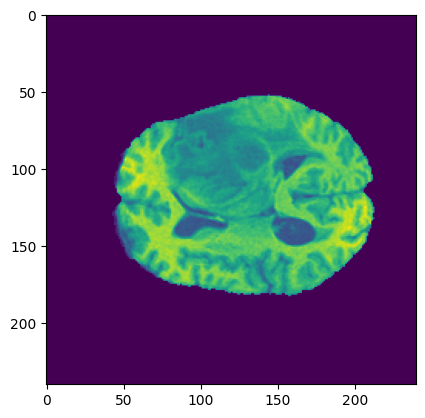

In [108]:
plt.imshow(nii_loader.t1[:, : , 77])

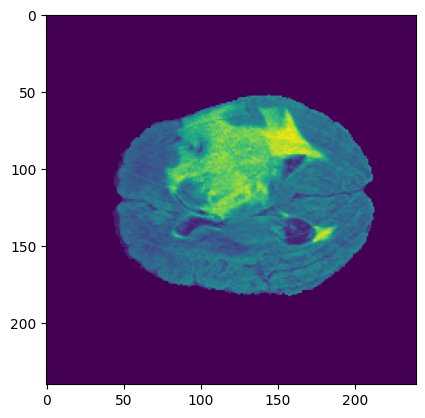

In [109]:
plt.imshow(nii_loader.flair[: ,: , 77])

In [107]:
import numpy as np
import nibabel as nib
from nilearn import plotting

data = nii_loader.flair

img = nib.Nifti1Image(data, np.eye(4))  # Assuming affine transformation as identity matrix

view = plotting.view_img(img,  cmap='gray')
view.open_in_browser()
# view.save_as_html('t1_viewer.html')  # optional
plotting.show()


c:\thesis\venv\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [ ]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Assuming nii_loader.t1ce is your raw image data
raw_image_data = nii_loader.t1ce

# Assuming mask_data is your mask with values 0 and 1
mask_data = np.ma.masked_array(nii_loader.t1ce == 0.03)

# Display the raw image
plt.imshow(raw_image_data, cmap='gray')

# Overlay the mask on top of the raw image
plt.imshow(mask_data, cmap='jet', alpha=0.5)  # Adjust alpha for transparency

plt.axis('off')  # Turn off axis
plt.show()


c:\thesis\venv\Lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


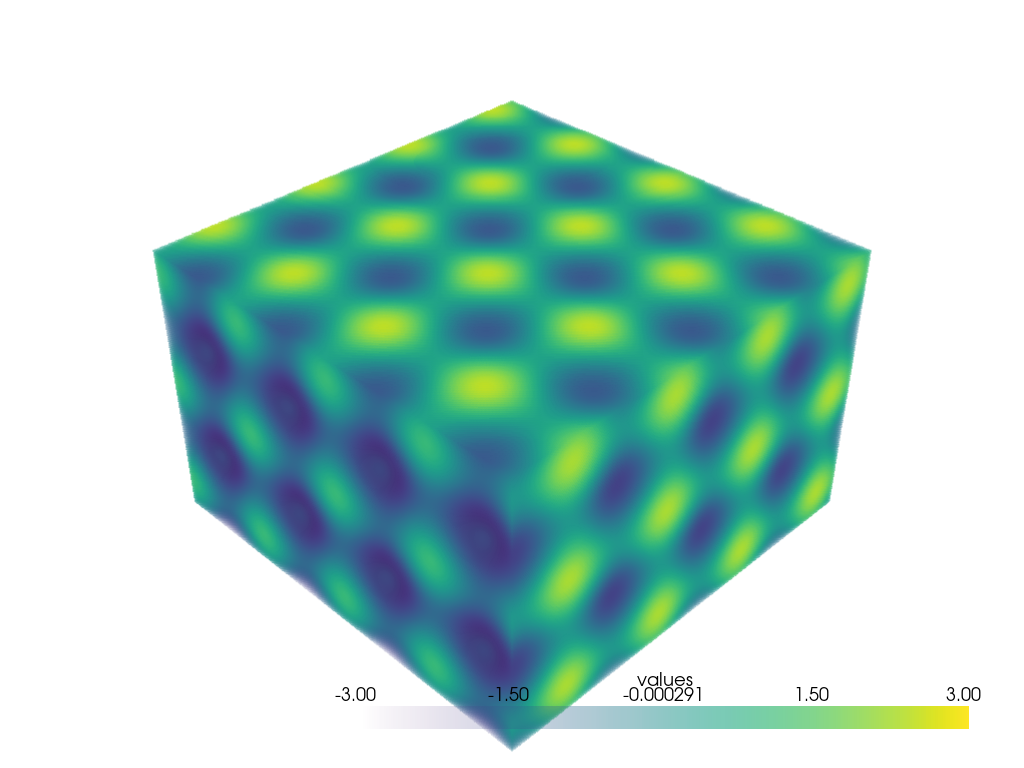

In [26]:
import numpy as np
import pyvista as pv

# Create a sample 3D volumetric dataset
x, y, z = np.mgrid[0:240, 0:240, 0:155]
data = np.sin(x/10) + np.cos(y/10) + np.sin(z/10)

# Convert the numpy array to a PyVista grid
grid = pv.wrap(data)

# Plot the volumetric data
plotter = pv.Plotter()
plotter.add_volume(grid, opacity='linear')
plotter.show()


In [23]:
indices = list_of_supervoxels[0].list_of_voxel_indices

mask_shape = (240, 240, 155)
boolean_mask = np.zeros(mask_shape, dtype=bool)

# Set the specified indices to True
for index in indices:
    boolean_mask[index] = True

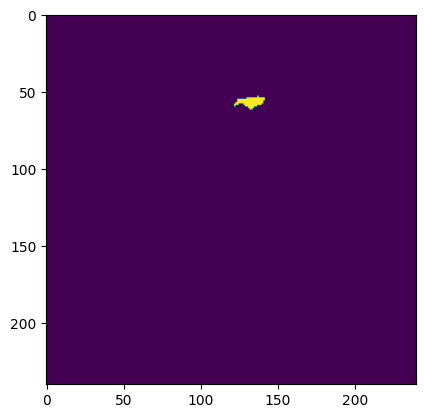

In [25]:
plt.imshow(boolean_mask[:, :, 80])

In [38]:
import numpy as np

# Example 3D arrays with shape (3, 3, 3) for simplicity
mask1 = np.array(
    [
        [[1, 0, 1], [1, 1, 0], [0, 0, 1]],
        [[1, 1, 0], [0, 1, 1], [1, 0, 0]],
        [[0, 1, 1], [1, 0, 1], [0, 1, 0]],
    ]
)

mask2 = np.array(
    [
        [[0, 1, 1], [1, 0, 0], [1, 1, 1]],
        [[1, 0, 1], [0, 1, 0], [1, 1, 1]],
        [[1, 0, 1], [1, 1, 1], [0, 1, 1]],
    ]
)

# Find the overlapping region where both masks are 1
overlap = np.logical_and(mask1 == 1, mask2 == 1)

# Count the number of overlapping elements
overlap_count = np.sum(overlap)

# Calculate the proportion of the second mask within the first one
total_mask2_elements = np.sum(mask2 == 1)
overlap_proportion = (
    overlap_count / total_mask2_elements if total_mask2_elements != 0 else 0
)

print("\nResult of logical AND (overlap):")
print(overlap)
print(
    f"\nNumber of overlapping elements: {overlap_count} with total count of non-zero values: {total_mask2_elements}"
)
print("Proportion of second mask within the first one:", overlap_proportion)


Result of logical AND (overlap):
[[[False False  True]
  [ True False False]
  [False False  True]]

 [[ True False False]
  [False  True False]
  [ True False False]]

 [[False False  True]
  [ True False  True]
  [False  True False]]]

Number of overlapping elements: 10 with total count of non-zero values: 19
Proportion of second mask within the first one: 0.5263157894736842


0.6666666666666666

In [30]:
import numpy as np

# Assuming mask1 and mask2 are your 3D NumPy arrays
mask1 = nl.mask  # Example data
mask2 = slic_labels  # Example data

# Find the overlapping region where both masks are 1
overlap = np.logical_and(mask1 == 1, mask2 == 1)

# Count the number of overlapping elements
overlap_count = np.sum(overlap)

print("Number of overlapping elements:", overlap_count)


Number of overlapping elements: 561


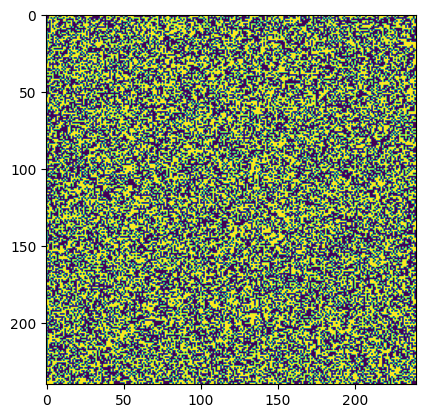

In [29]:
plt.imshow(mask1[:, :, 77])

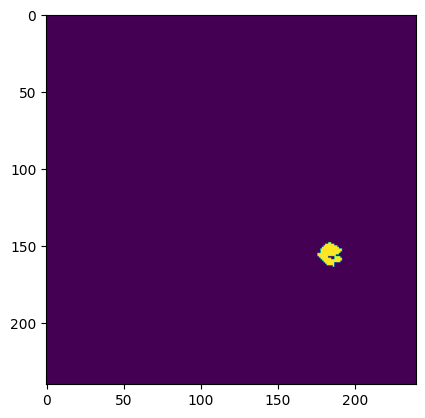

In [21]:
plt.imshow(slic_labels[:, :, 77] == 1098)